In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
import seaborn as sns

df = pd.read_csv('data_join.csv')
df

,Unnamed: 0,user_id,name,purchase,1.0,0,appid,release_date,english,developer,...,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,1394,151603712.0,Fallout 4,purchase,1.0,0.0,377160.0,2015-11-09,1.0,Bethesda Game Studios,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84.0,110376.0,45377.0,4822.0,2904.0,5000000-10000000,19.99
1,1395,151603712.0,Fallout 4,play,87.0,0.0,377160.0,2015-11-09,1.0,Bethesda Game Studios,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84.0,110376.0,45377.0,4822.0,2904.0,5000000-10000000,19.99
2,1396,87445402.0,Fallout 4,purchase,1.0,0.0,377160.0,2015-11-09,1.0,Bethesda Game Studios,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84.0,110376.0,45377.0,4822.0,2904.0,5000000-10000000,19.99
3,1397,87445402.0,Fallout 4,play,83.0,0.0,377160.0,2015-11-09,1.0,Bethesda Game Studios,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84.0,110376.0,45377.0,4822.0,2904.0,5000000-10000000,19.99
4,1398,25096601.0,Fallout 4,purchase,1.0,0.0,377160.0,2015-11-09,1.0,Bethesda Game Studios,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84.0,110376.0,45377.0,4822.0,2904.0,5000000-10000000,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92878,200050,116564064.0,Warriors & Castles,purchase,1.0,0.0,372380.0,2015-06-30,1.0,Estudio Raed Wulf,...,Multi-player;Online Multi-Player;Cross-Platfor...,Action;Indie;Early Access,Early Access;Action;Indie,32.0,51.0,17.0,0.0,0.0,0-20000,1.99
92879,200055,135400225.0,Life is Hard,purchase,1.0,0.0,414080.0,2015-11-03,1.0,Pirozhok Studio;Vitaliy Ruzankin,...,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie;Simulation;Strategy;Early Access,Early Access;Strategy;Indie,31.0,339.0,132.0,338.0,340.0,50000-100000,5.99
92880,200056,135400225.0,Life is Hard,play,3.1,0.0,414080.0,2015-11-03,1.0,Pirozhok Studio;Vitaliy Ruzankin,...,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie;Simulation;Strategy;Early Access,Early Access;Strategy;Indie,31.0,339.0,132.0,338.0,340.0,50000-100000,5.99
92881,200057,135400225.0,Executive Assault,purchase,1.0,0.0,331500.0,2015-07-17,1.0,Hesketh Studios Ltd,...,Single-player;Multi-player;Co-op,Action;Strategy,Strategy;RTS;Action,0.0,1180.0,185.0,363.0,363.0,50000-100000,10.29


<AxesSubplot:xlabel='purchase', ylabel='hours_played'>

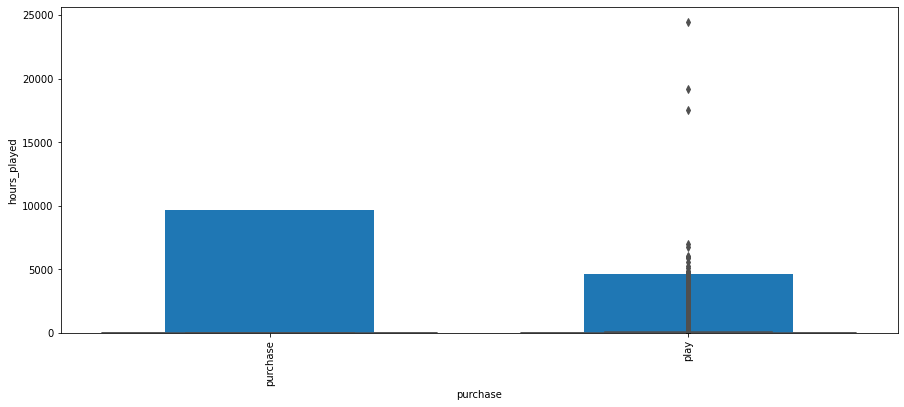

In [2]:


df = df.reset_index(drop = True)
df.shape
df.rename(columns={'1.0':'hours_played', 'name':"game_name"},inplace=True)
df

# plotting the top 15 games:
df['game_name'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))

#box plot:
sns.boxplot(x = 'purchase',y ='hours_played',data = df,palette='rainbow')

In [3]:
# from this we get id of player how had played a game for more than or equal to 2 hours
df= df[(df['hours_played']>=2) & (df['purchase']=='play')]
#Deleting the games that have less than 1000 positive ratings
df = df[df['positive_ratings'] > 1000]

#game name 개수
df = df[df.groupby('game_name').user_id.transform(len)>=20]
df['game_name'].nunique()
df.sort_values(['hours_played'], ascending=False).head(10)

,Unnamed: 0,user_id,game_name,purchase,hours_played,0,appid,release_date,english,developer,...,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
15162,18639,100630947.0,Dota 2,play,24422.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
7503,9646,153382649.0,Team Fortress 2,play,19203.0,0.0,440.0,2007-10-10,1.0,Valve,...,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520.0,515879.0,34036.0,8495.0,623.0,20000000-50000000,0.0
17696,21173,130882834.0,Dota 2,play,17493.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
18578,22055,52567955.0,Dota 2,play,6964.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
15842,19319,121199670.0,Dota 2,play,6753.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
15194,18671,86256882.0,Dota 2,play,6015.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
14248,17725,101414179.0,Dota 2,play,5982.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
16512,19989,12660489.0,Dota 2,play,5970.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
15256,18733,95758079.0,Dota 2,play,5866.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0
12106,15583,67694595.0,Dota 2,play,5608.0,0.0,570.0,2013-07-09,1.0,Valve,...,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0.0,863507.0,142079.0,23944.0,801.0,100000000-200000000,0.0


In [4]:

#average played hours
average = df.groupby(['game_name'],as_index = False).hours_played.mean()

average['avg_hourplayed'] = average['hours_played']
average.drop(columns ='hours_played',inplace = True )
average.sort_values(['avg_hourplayed'], ascending=False).head(10)

,game_name,avg_hourplayed
24,Counter-Strike,340.465990
37,Dota 2,312.302271
46,Europa Universalis IV,243.800000
140,Stronghold Kingdoms,213.290909
8,Arma 3,166.958333
25,Crusader Kings II,150.146667
143,Team Fortress 2,123.705285
20,Clicker Heroes,117.354545
1,APB Reloaded,113.377778
161,Transformice,102.509091


In [5]:
df = df.merge(average,on = 'game_name')

df = df[['user_id','game_name','hours_played','avg_hourplayed']]
df_old = df[['user_id','game_name','hours_played','avg_hourplayed']]
df
#Column needed for collaborative filtering : user_id, game_name, hours_played,avg_hourplayed

,user_id,game_name,hours_played,avg_hourplayed
0,151603712.0,Fallout 4,87.0,66.819876
1,87445402.0,Fallout 4,83.0,66.819876
2,211925330.0,Fallout 4,133.0,66.819876
3,115396529.0,Fallout 4,17.9,66.819876
4,4834220.0,Fallout 4,19.8,66.819876
...,...,...,...,...
19124,209817175.0,Depth,7.3,11.063636
19125,159800136.0,Depth,7.0,11.063636
19126,188681523.0,Depth,5.0,11.063636
19127,77565315.0,Depth,11.5,11.063636


In [6]:
condition = [
    df['hours_played']>= (0.8*df['avg_hourplayed']),
   (df['hours_played']>=0.6*df['avg_hourplayed'])&(df['hours_played']<0.8*df['avg_hourplayed']),
   (df['hours_played']>=0.4*df['avg_hourplayed'])&(df['hours_played']<0.6*df['avg_hourplayed']),
   (df['hours_played']>=0.2*df['avg_hourplayed'])&(df['hours_played']<0.4*df['avg_hourplayed']),
    df['hours_played']>=0
    
]
values = [5,4,3,2,1]
df['rating'] = np.select(condition,values)
df
#rating과 userid 타입 변환
df['rating'] = df['rating'].astype(int) 
df['user_id'] = df['user_id'].astype(int)

In [7]:
# keeping all important columns (game_id,game_name,rating ) and drop all other columns
df.drop(columns = ['hours_played', 'avg_hourplayed'],inplace =True )
df

,user_id,game_name,rating
0,151603712,Fallout 4,5
1,87445402,Fallout 4,5
2,211925330,Fallout 4,5
3,115396529,Fallout 4,2
4,4834220,Fallout 4,2
...,...,...,...
19124,209817175,Depth,4
19125,159800136,Depth,4
19126,188681523,Depth,3
19127,77565315,Depth,5


In [8]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise import accuracy
sns.set_style("darkgrid")

reader = Reader()

# get just top 100K rows for faster run time 
data = Dataset.load_from_df(df[['user_id', 'game_name', 'rating']][:], reader)

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])
trainset = data.build_full_trainset()
svd.fit(trainset)
testset = trainset.build_testset()

print("Testing RMSE")
predictions = svd.test(testset)
accuracy.rmse(predictions)


Testing RMSE
RMSE: 0.7457


0.7457105970869053

In [9]:
from surprise.model_selection import GridSearchCV, cross_validate

param_grid = {'n_factors': [50, 75], 'lr_all': [0.5, 0.05], 'reg_all': [0.06, 0.04]} 
gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid) 
gs.fit(data) 
print('\n###################') 
print('Best Score :', gs.best_score['rmse']) 
print('Best Parameters :', gs.best_params['rmse']) 
print('#####################')


###################
Best Score : 1.6192514350055867
Best Parameters : {'n_factors': 75, 'lr_all': 0.05, 'reg_all': 0.06}
#####################


In [10]:
best_params = gs.best_params['rmse']
svd = SVD(n_factors=best_params['n_factors'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

### SVD 학습
svd.fit(trainset)

### 최종으로 RMSE 측정
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.4117


0.4116528009230045

In [11]:
#sorted by most played player
Game_by_Hour = df_old.groupby('user_id')['hours_played'].sum()
sorted_by_hour = Game_by_Hour.sort_values(ascending = False)
sorted_by_hour

user_id
100630947.0    24425.4
153382649.0    19203.0
130882834.0    17493.0
52567955.0      7704.6
121199670.0     6755.2
                ...   
178932673.0        2.0
67083031.0         2.0
180662971.0        2.0
14153959.0         2.0
106797670.0        2.0
Name: hours_played, Length: 6571, dtype: float64

In [12]:
print("-----------------------------------")
print("User_id list")
print(df['user_id'].values)
print("-----------------------------------")
from collections import defaultdict

def CF_recommend_Game(userID):
    print("USERID : ", userID )
    print("--------------------------------")
    print()
    #유저 아이디 입력, rating이 4나 5 이상인것을 
    df_user_past = df[(df['user_id'] == userID)]
    df_user = df[(df['user_id'] == userID) &(3 < df['rating']) ]
    print("Preference game of user (Rating 4 or 5)")
    print(df_user)
    print()

    print("----------------------------")
    past_record = df_user_past['game_name'].values
    print("Users record of played game")
    print(past_record)
    print()

    df_user_cf = df.copy()

    df_user_cf['Estimate_Score'] = df_user_cf['game_name'].apply(lambda x: svd.predict(userID, x).est)

    df_user_cf = df_user_cf.sort_values('Estimate_Score', ascending=False)
    df_user_cf.drop('user_id',axis=1)
    result = df_user_cf.drop_duplicates(['game_name'])
    result = result[~result.game_name.isin(past_record)].iloc[0:5,:]
    result = result[['game_name','Estimate_Score']]

    print("----------------------------")
    print("Recommendation : ")
    print(result)

    return result


-----------------------------------
User_id list
[151603712  87445402 211925330 ... 188681523  77565315 154230933]
-----------------------------------


In [13]:
#player 1 
result = CF_recommend_Game(100630947)


USERID :  100630947
--------------------------------

Preference game of user (Rating 4 or 5)
        user_id game_name  rating
5021  100630947    Dota 2       5

----------------------------
Users record of played game
['Dota 2' 'Rust']

----------------------------
Recommendation : 
                           game_name  Estimate_Score
11761  Brothers - A Tale of Two Sons        4.630438
8948                         Mad Max        4.623133
11703                    Antichamber        4.480511
11719                          Braid        4.431839
12141                          LIMBO        4.413855


In [14]:
#player 2 
result = CF_recommend_Game(153382649)

USERID :  153382649
--------------------------------

Preference game of user (Rating 4 or 5)
        user_id        game_name  rating
2493  153382649  Team Fortress 2       5

----------------------------
Users record of played game
['Team Fortress 2']

----------------------------
Recommendation : 
                           game_name  Estimate_Score
11739  Brothers - A Tale of Two Sons        5.000000
13396              The Wolf Among Us        4.882764
12163                          LIMBO        4.764206
11732                          Braid        4.650535
12865                 Shadow Warrior        4.625013


In [16]:
result = CF_recommend_Game(188681523)

USERID :  188681523
--------------------------------

Preference game of user (Rating 4 or 5)
         user_id   game_name  rating
8544   188681523  Insurgency       5
12667  188681523    PAYDAY 2       5
14195  188681523    Unturned       5

----------------------------
Users record of played game
['Team Fortress 2' "Garry's Mod" 'Insurgency' 'PAYDAY 2' 'Unturned'
 'Depth']

----------------------------
Recommendation : 
               game_name  Estimate_Score
11785          Contagion        4.729100
12128              LIMBO        4.553130
13410  The Wolf Among Us        4.538525
11804        Cry of Fear        4.519495
11725              Braid        4.498337


In [17]:
result = CF_recommend_Game(52567955)

USERID :  52567955
--------------------------------

Preference game of user (Rating 4 or 5)
        user_id       game_name  rating
6147   52567955          Dota 2       5
16167  52567955  Counter-Strike       5

----------------------------
Users record of played game
['Dota 2' 'Counter-Strike' 'Day of Defeat']

----------------------------
Recommendation : 
          game_name  Estimate_Score
11733         Braid        5.000000
12172         LIMBO        4.971206
11796   Cry of Fear        4.740248
16467  Project CARS        4.736885
15710    Dino D-Day        4.726532
